In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\amf\\Documents\\CSC450\\winequality-red.csv")

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
X=df.drop(['fixed acidity'], axis=1) # independent variables

In [8]:
y=df['fixed acidity']  # target

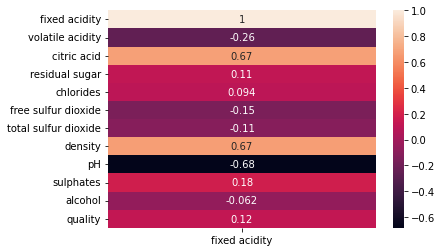

In [9]:
import seaborn as sns
#plt.figure(figsize=(7,5))
sns.heatmap(df.corr()[['fixed acidity']], annot=True)
plt.show()

In [10]:
# we can drop some features that are similar, to reduce dimensionality, but let's keep all features for predictions.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#use training set and testing (holdout set)  # ----------------------*********
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
modelReg= LinearRegression()
modelReg.fit(X_train,y_train)
y_pred= modelReg.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index)
pd.concat([y_test, y_pred_df], axis=1)

,fixed acidity,0
75,8.8,9.095698
1283,8.7,8.732050
408,10.4,9.598439
1281,7.1,7.381562
1118,7.1,7.219287
...,...,...
890,7.2,7.027246
146,5.8,4.897461
1551,7.1,7.505924
1209,6.2,6.900200


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s= r2_score(y_test, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.3946041206150892, mae = 0.4801956483166963, r2s=0.842898691669472


In [12]:
# Random forest algorithm
from sklearn.ensemble import RandomForestRegressor

In [13]:
modelRF= RandomForestRegressor(random_state=4)
>>> modelRF.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

In [14]:
y_pred= modelRF.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index)
pd.concat([y_test, y_pred_df], axis=1)

,fixed acidity,0
75,8.8,8.957
1283,8.7,8.294
408,10.4,10.080
1281,7.1,7.042
1118,7.1,7.136
...,...,...
890,7.2,6.764
146,5.8,5.863
1551,7.1,7.544
1209,6.2,7.805


In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s= r2_score(y_test, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.35042265520594623, mae = 0.42481388020833305, r2s=0.860488386396727


In [16]:
# Issues with training and test sets:
# test set is exposed to the model when improving the model performance.This may cause overfitting.
# Test set might not be representative of the dataset, more test sets if preferred
# for this reason it is better to create a train-validate-test sets

In [17]:
# Create train-validate-test sets
# split the training set above to training set and validation set. Keep the original test set as is for last
# now we have train - validate - test sets. Use the train and validate sets for training and tuning the hyperparameters.
# No parameter tuning is performed in this example.
# When model is optimized, then retrain on the whole training set and perform test on the test set.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
modelRF.fit(X_train2,y_train2)  # train
y_pred= modelRF.predict(X_valid) # validate
y_pred_df = pd.DataFrame(y_pred, index=X_valid.index)
pd.concat([y_valid, y_pred_df], axis=1)
# ------------------    ******
# ------------++++++   (X_train2/y_train :   X_valid/y_valid)

,fixed acidity,0
1516,6.1,6.3510
291,11.0,9.5490
603,13.2,12.7780
516,12.5,11.9946
1433,6.1,6.6530
...,...,...
966,9.0,9.9020
1267,10.4,9.8050
859,6.8,6.7890
95,4.7,5.2870


In [18]:
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2s= r2_score(y_valid, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.32218174697591107, mae = 0.3836388671874996, r2s=0.8795623955354539


In [19]:
# Now we can train the model on the whole training data, then do the testing . Left as an exercise.

In [20]:
# The issue of exposing the validation set to the model during validation and the hyperparameter tuning is still not resolved. It is
# better to have multiple test sets so that model is not honing on one particular test set
# for this we have Cross Validation with K-folds
# -----------****      .....
# ------*****----      .....
# ---***-------        .....
# ****----------       .....
# kFold cross validation can be use to give a better estimate of the performance of the mondel ( avarging over different
# validation sets) and also allows use to compare different alorithms for modeling our problem.


from sklearn.model_selection import cross_val_score
models=[LinearRegression(), RandomForestRegressor()]
for model in models:
 model.fit(X_train2, y_train2)
 scores = cross_val_score(model, X_train2, y_train2, cv=5)  # cv cross validation set to k=5 folds.
 print(scores)
 scores_average = (sum(scores))/(len(scores))
 print(f' Here is the result: {model}, {scores_average}')
# cross validation can be used for more accurate performance of our algorithm
# Used for model comparison


[0.86766208 0.88404741 0.86536333 0.8502074  0.88521546]
 Here is the result: LinearRegression(), 0.8704991350446853
[0.90557362 0.85901734 0.86548105 0.84046972 0.86147342]
 Here is the result: RandomForestRegressor(), 0.866403031368705


In [21]:
# train - validate - test sets approach is often utilized for 
# hyperparameter optimization
from pprint import pprint
pprint(modelRF.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


In [22]:
modelRF= RandomForestRegressor(random_state=1, n_estimators=50, n_jobs=-1) # n_estimator = number of trees in the forest
modelRF.fit(X_train2, y_train2)
y_pred= modelRF.predict(X_valid)
y_pred_df = pd.DataFrame(y_pred, index=X_valid.index)
pd.concat([y_valid, y_pred_df], axis=1)

,fixed acidity,0
1516,6.1,6.402000
291,11.0,9.910000
603,13.2,12.686000
516,12.5,12.197000
1433,6.1,6.582000
...,...,...
966,9.0,10.090000
1267,10.4,9.868000
859,6.8,6.790000
95,4.7,5.354667


In [23]:
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2s= r2_score(y_valid, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.318671337265625, mae = 0.37915182291666644, r2s=0.8808746527944834


In [24]:
# for the purpose of hyperparameter tuning we can create a grid over the parameter domain
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 600, 10)]
#rf_n_estimators.append(1500)
#rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt']   #rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}
pprint(rf_grid)

{'bootstrap': [True, False],
 'criterion': ['mse', 'mae'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt'],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600]}


In [25]:
# use RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV   # Not GradientBoostingClassifier
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 10, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)  # verbose higher, more messages.

# Fit the random search model
rf_random.fit(X_train2, y_train2)

# View the best parameters from the random search
xy=rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [26]:
type(rf_random.best_params_)
xy

{'n_estimators': 377,
 'min_samples_split': 10,
 'min_impurity_decrease': 0.0,
 'max_features': 'auto',
 'max_depth': 55,
 'criterion': 'mae',
 'bootstrap': True}

In [27]:
# should try to use these parameter values for the model.
modelRF= RandomForestRegressor(n_estimators=377,
 min_samples_split= 10,
 min_impurity_decrease= 0.0,
 max_features= 'auto',
 max_depth= 55,
 criterion= 'mae',
 bootstrap= True,
 n_jobs=-1)
modelRF.fit(X_train2, y_train2)
y_pred= modelRF.predict(X_valid)
y_pred_df = pd.DataFrame(y_pred, index=X_valid.index)
pd.concat([y_valid, y_pred_df], axis=1)

C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


,fixed acidity,0
1516,6.1,6.528647
291,11.0,9.718302
603,13.2,12.535279
516,12.5,11.850265
1433,6.1,6.605570
...,...,...
966,9.0,9.787533
1267,10.4,9.742308
859,6.8,6.773873
95,4.7,5.359416


In [28]:
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2s= r2_score(y_valid, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.3568925488409745, mae = 0.42596879144562394, r2s=0.8665868441117281


In [46]:
# from the outout in In [20], we know that LinearRegression has a better average performance.
# we use it to go back to the original  X_train and train the algorithm on that set and do the testing on the original set 
# X_test as well.
modelReg.fit(X_train,y_train)
y_pred=modelReg.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index)
pd.concat([y_test, y_pred_df], axis=1)

,fixed acidity,0
75,8.8,9.095698
1283,8.7,8.732050
408,10.4,9.598439
1281,7.1,7.381562
1118,7.1,7.219287
...,...,...
890,7.2,7.027246
146,5.8,4.897461
1551,7.1,7.505924
1209,6.2,6.900200


In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s= r2_score(y_test, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')

 mse = 0.3946041206150892, mae = 0.4801956483166963, r2s=0.842898691669472
